<a href="https://colab.research.google.com/github/sofyanz66/5099_Model-Regresi-Random-Forest-untuk-Prediksi-Harga-Cryptocurrency/blob/main/22_11_5099_UAS_BDDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Sofyan**

**Nim : 22.11.5099**

#Model Regresi Random Forest untuk Prediksi Harga Cryptocurrency

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [5]:
data = pd.read_csv("/content/crypto-markets.csv", nrows=10000)

model = RandomForestRegressor(n_estimators=50, random_state=42)

In [6]:
# Data Preprocessing
# Convert 'date' to datetime and sort data
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by='date')

In [7]:
# Select relevant features
features = ['open', 'high', 'low', 'volume', 'spread']
X = data[features]
y = data['close']

In [8]:
# Handle missing values (if any)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Modeling
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Menyimpan model
joblib.dump(model, "crypto_price_model.pkl")

['crypto_price_model.pkl']

In [11]:
# Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
# Display evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 13.87027439370668
Mean Squared Error (MSE): 5885.323245040653
R-squared (R²): 0.9984614237354037


In [13]:
# Example prediction
example_data = X_test.iloc[:5]
example_predictions = model.predict(example_data)
print("Example Predictions:", example_predictions)


Example Predictions: [2.3017748e-01 1.8582200e-03 3.5619000e+00 3.7010000e+00 1.8171200e-03]


In [14]:
# Load the saved model
model = joblib.load("crypto_price_model.pkl")

# Create a sample data point for testing (replace with your actual data)
sample_data = pd.DataFrame({
    'open': [10000],
    'high': [10500],
    'low': [9500],
    'volume': [1000000],
    'spread': [1000]
})

# Make predictions using the loaded model
predicted_price = model.predict(sample_data)

# Print the predicted price
print("Predicted Price:", predicted_price[0])

Predicted Price: 10238.675499999981


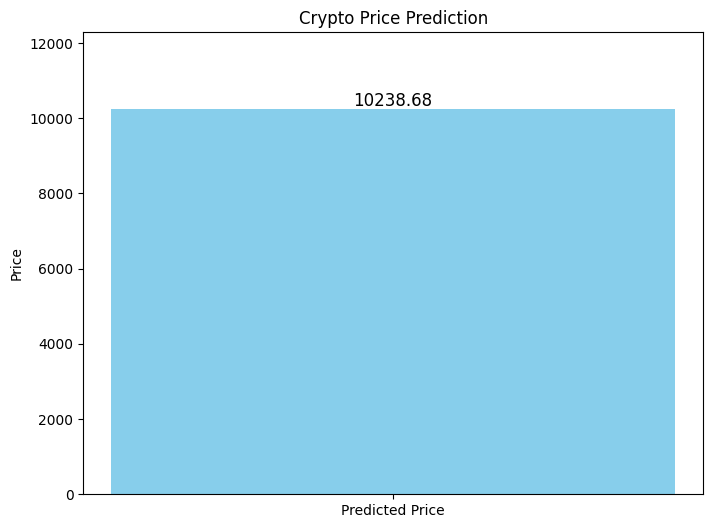

In [17]:
# Visualisasi hasil prediksi
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

predicted_price = model.predict(sample_data)[0]  # Mengambil nilai prediksi

plt.figure(figsize=(8, 6))  # Mengatur ukuran gambar
plt.bar(['Predicted Price'], [predicted_price], color='skyblue')
plt.title('Crypto Price Prediction')
plt.ylabel('Price')
plt.ylim(0, predicted_price * 1.2)  # Mengatur batas sumbu y agar lebih jelas
plt.text(0, predicted_price + 100, f'{predicted_price:.2f}', ha='center', fontsize=12)  # Menampilkan nilai prediksi di atas bar

plt.show()

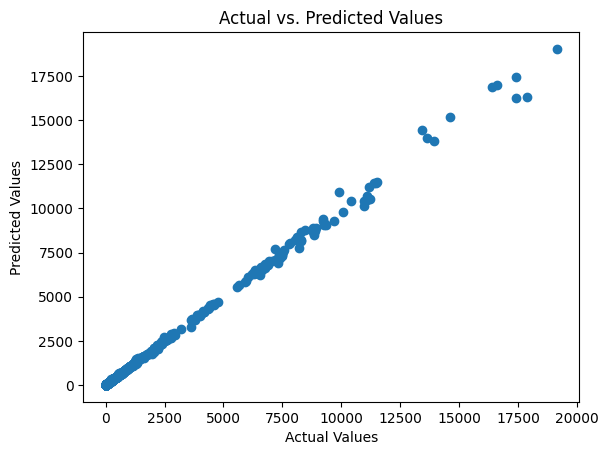

,open,high,low,volume,spread
3438,0.205360,0.247677,0.193839,160620000.0,0.05
5914,0.001840,0.001888,0.001809,28249.0,0.00
8360,3.500000,3.620000,3.490000,2446510.0,0.13
8979,3.870000,3.890000,3.520000,5039290.0,0.37
5881,0.001758,0.001858,0.001721,57599.0,0.00


In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Menampilkan tabel X_test
display(X_test.head()) # Menggunakan display untuk menampilkan tabel di Jupyter Notebook

In [20]:
# Menambahkan keterangan hasil tes
textstr = '\n'.join((
    r'MAE=%.2f' % (mae, ),
    r'MSE=%.2f' % (mse, ),
    r'R²=%.2f' % (r2, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

Text(0.05, 0.95, 'MAE=13.87\nMSE=5885.32\nR²=1.00')

#Kesimpulan:

**Model yang digunakan untuk prediksi harga cryptocurrency adalah Random Forest Regressor, yang termasuk dalam kategori Predictive Analytics dan menggunakan pendekatan Regresi. Model ini dilatih menggunakan data historis meliputi harga pembukaan, harga tertinggi, harga terendah, volume perdagangan,selisih harga untuk memprediksi harga penutupan cryptocurrency, dan menampilkan prediksi harga dan metrik evaluasi model (MAE, MSE, R²).**